GPU: True


100%|████████████████████████████████████| 500/500 [00:09<00:00, 55.08it/s, Iter=500, Loss=1.01e+01]


Adam done!
Iter: 1000 Loss: 0.009209815412759781
Iter: 2000 Loss: 0.000727048609405756
LBGFS done!
change_counts 0 Test_L2error: 1.66e-02


100%|███████████████████████████████████| 500/500 [00:08<00:00, 59.51it/s, Iter=3000, Loss=1.03e-01]


Adam done!
Iter: 4000 Loss: 0.0014482061378657818
Iter: 5000 Loss: 0.00037662708200514317
LBGFS done!
change_counts 1 Test_L2error: 4.84e-03


100%|███████████████████████████████████| 500/500 [00:08<00:00, 59.43it/s, Iter=5500, Loss=7.04e-02]


Adam done!
Iter: 6000 Loss: 0.0038618789985775948
Iter: 7000 Loss: 0.0006747826701030135
LBGFS done!
change_counts 2 Test_L2error: 4.81e-03


100%|███████████████████████████████████| 500/500 [00:08<00:00, 59.46it/s, Iter=8437, Loss=4.67e-02]


Adam done!
Iter: 9000 Loss: 0.0023921856191009283
Iter: 10000 Loss: 0.0006323585985228419
Iter: 11000 Loss: 0.0003110002726316452
LBGFS done!
change_counts 3 Test_L2error: 6.89e-03


100%|██████████████████████████████████| 500/500 [00:08<00:00, 59.41it/s, Iter=12060, Loss=4.40e-02]


Adam done!
Iter: 13000 Loss: 0.0009820644045248628
Iter: 14000 Loss: 0.000376273033907637
Iter: 15000 Loss: 0.00024351540196221322
LBGFS done!
change_counts 4 Test_L2error: 3.74e-03


100%|██████████████████████████████████| 500/500 [00:08<00:00, 59.10it/s, Iter=15839, Loss=1.95e-02]


Adam done!
Iter: 16000 Loss: 0.006756416521966457
Iter: 17000 Loss: 0.0007265637977980077
Iter: 18000 Loss: 0.0003544983046595007
LBGFS done!
change_counts 5 Test_L2error: 3.94e-03


100%|██████████████████████████████████| 500/500 [00:08<00:00, 58.93it/s, Iter=18505, Loss=2.28e-02]


Adam done!
Iter: 19000 Loss: 0.0018507420318201184
Iter: 20000 Loss: 0.0004962247330695391
Iter: 21000 Loss: 0.0002678903692867607
LBGFS done!
change_counts 6 Test_L2error: 4.72e-03


100%|██████████████████████████████████| 500/500 [00:08<00:00, 59.15it/s, Iter=21826, Loss=4.87e-02]


Adam done!
Iter: 22000 Loss: 0.008673659525811672
Iter: 23000 Loss: 0.0007757204584777355
Iter: 24000 Loss: 0.00035572427441366017
LBGFS done!
change_counts 7 Test_L2error: 6.24e-03


100%|██████████████████████████████████| 500/500 [00:08<00:00, 59.10it/s, Iter=24977, Loss=6.55e-02]


Adam done!
Iter: 25000 Loss: 0.0629916712641716
Iter: 26000 Loss: 0.0009238419588655233
Iter: 27000 Loss: 0.0004004522634204477
LBGFS done!
change_counts 8 Test_L2error: 5.72e-03


100%|██████████████████████████████████| 500/500 [00:08<00:00, 59.45it/s, Iter=27705, Loss=1.73e-02]


Adam done!
Iter: 28000 Loss: 0.004222279414534569
Iter: 29000 Loss: 0.0006233251770026982
LBGFS done!
change_counts 9 Test_L2error: 7.64e-03
Training time: 649.60
[[0, '1.66e-02'], [1, '4.84e-03'], [2, '4.81e-03'], [3, '6.89e-03'], [4, '3.74e-03'], [5, '3.94e-03'], [6, '4.72e-03'], [7, '6.24e-03'], [8, '5.72e-03'], [9, '7.64e-03']]


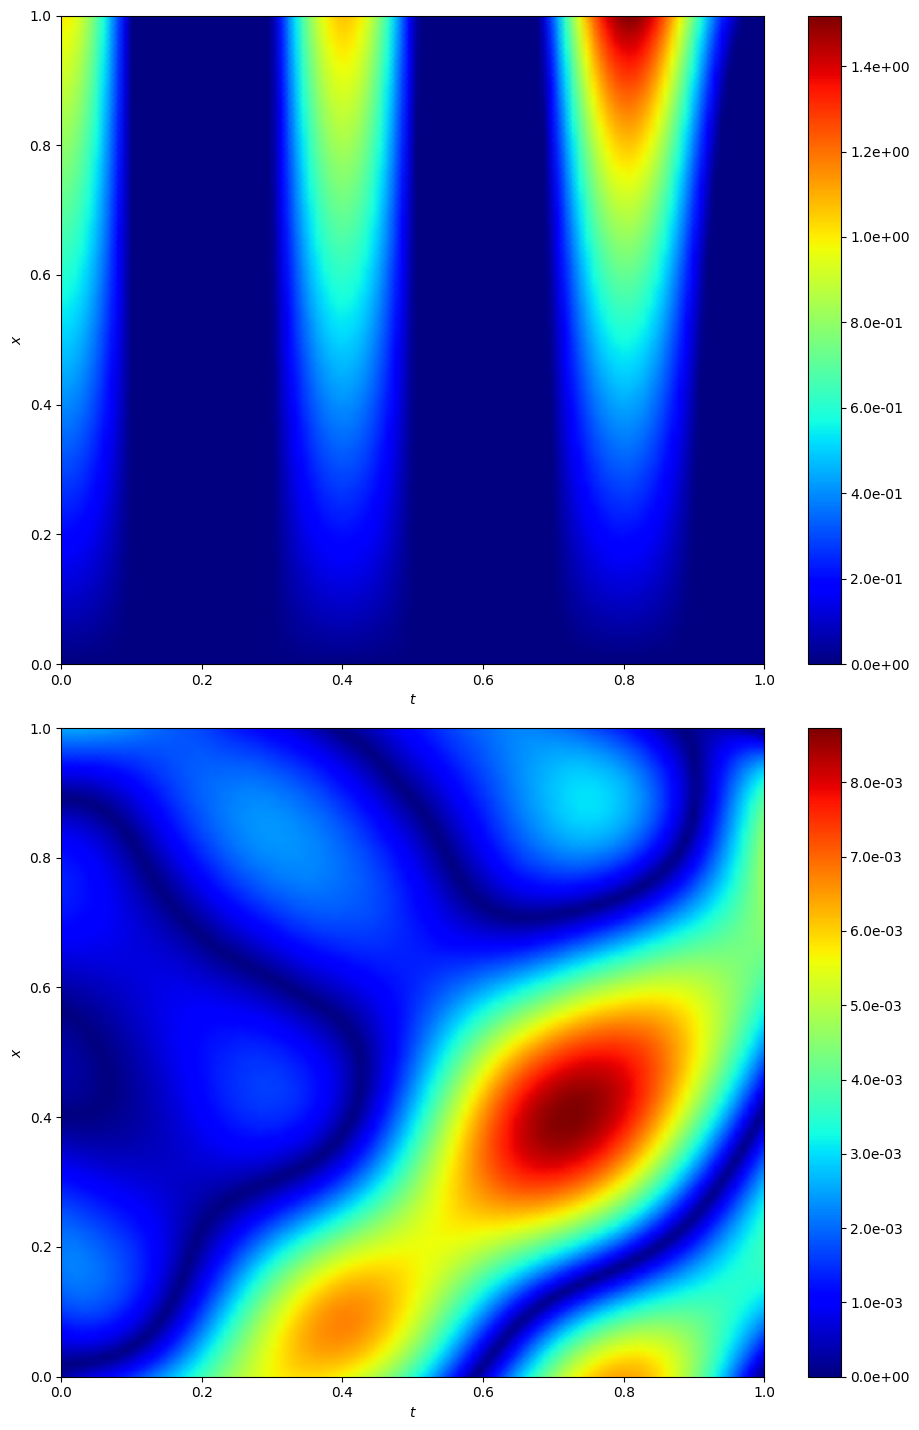

In [2]:
import os
import time
import numpy as np
import torch
from matplotlib import pyplot as plt, gridspec
from torch import nn
from torch.autograd import Variable
from tqdm import tqdm, trange
from pyDOE import lhs
from collections import OrderedDict
#os.environ['CUDA_VISIBLE_DEVICES'] = '1'
seed = 1234
torch.set_default_dtype(torch.float)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
device = torch.device('cuda')
use_gpu = torch.cuda.is_available()
print('GPU:', use_gpu)


def random_fun(num):
    temp = torch.from_numpy(lb + (ub - lb) * lhs(2, num)).float()
    if use_gpu:
        temp = temp.cuda()
    return temp


def is_cuda(data):
    if use_gpu:
        data = data.cuda()
    return data

class Net(nn.Module):

    def __init__(self, layers):
        super(Net, self).__init__()
        self.layers = layers
        self.indim = layers[0]
        self.outdim = layers[-1]
        self.hidden_units = layers[1:-1]
        self.dense_layers = nn.ModuleList()
        self.iter = 0
        # if isinstance(hidden_units, int):
        #     hidden_units = [hidden_units]
        # print(f"hidden_units inside Dense_ScaleNet: {hidden_units}, type: {type(hidden_units)}")

        input_layer = nn.Linear(self.indim, self.hidden_units[0])
        nn.init.xavier_normal_(input_layer.weight)
        nn.init.uniform_(input_layer.bias, -1, 1)
        self.dense_layers.append(input_layer)

        for i_layer in range(len(self.hidden_units) - 1):
            if i_layer == 0:
                hidden_layer = nn.Linear(2 * self.hidden_units[i_layer], self.hidden_units[i_layer + 1])
                nn.init.xavier_normal_(hidden_layer.weight)
                nn.init.uniform_(hidden_layer.bias, -1, 1)
            else:
                hidden_layer = nn.Linear(self.hidden_units[i_layer], self.hidden_units[i_layer + 1])
                nn.init.xavier_normal_(hidden_layer.weight)
                nn.init.uniform_(hidden_layer.bias, -1, 1)
            self.dense_layers.append(hidden_layer)

        out_layer = nn.Linear(self.hidden_units[-1], self.outdim)
        nn.init.xavier_normal_(out_layer.weight)
        nn.init.uniform_(out_layer.bias, -1, 1)
        self.dense_layers.append(out_layer)

    def forward(self, inputs, sFourier=0.5):
        # ------ dealing with the input data ---------------
        #scale= [30,31,32,33,34,35,36,37,38,39,40,41,42,42,43,44,45,46,46,47,48,49]
        scale= [20, 21, 22, 23, 24, 26, 27, 28, 29, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 25]
        #scale= np.arange(1, 31)
        #scale = [1, 2, 4, 6, 8]

        dense_in = self.dense_layers[0]
        H = dense_in(inputs)

        Unit_num = int(self.hidden_units[0] / len(scale))
        mixcoe = np.repeat(scale, Unit_num)
        mixcoe = np.concatenate((mixcoe, np.ones([self.hidden_units[0] - Unit_num * len(scale)]) * scale[-1]))
        mixcoe = mixcoe.astype(np.float32)
        torch_mixcoe = torch.from_numpy(mixcoe)
        torch_mixcoe = torch_mixcoe.to(device)
        H = sFourier * torch.cat([torch.cos(H * torch_mixcoe), torch.sin(H * torch_mixcoe)], dim=-1)

        #  ---resnet(one-step skip connection for two consecutive layers if have equal neurons）---
        # hiddens_record = self.hidden_units[0]
        for k in range(len(self.hidden_units) - 1):
            # H_pre = H
            dense_layer = self.dense_layers[k + 1]
            H = dense_layer(H)
            H = torch.tanh(H)
            # if (self.hidden_units[k+1] == hiddens_record) and (k != 0):
            #     H = H + H_pre
            # hiddens_record = self.hidden_units[k+1]

        dense_out = self.dense_layers[-1]
        H = dense_out(H)
        out_results = H
        return out_results



class Model:
    def __init__(self, net, x_bc,
                 u_bc,
                 x_ic,
                 u_ic, x_f_loss_fun,
                 x_test, x_test_exact
                 ):

        self.x_ic_s = None
        self.x_bc_s = None
        self.x_ict_s = None
        self.x_f_s = None
        self.s_collect = []

        self.optimizer_LBGFS = None
        self.net = net

        self.x_bc = x_bc
        self.u_bc = u_bc

        self.x_ic = x_ic
        self.u_ic = u_ic

        self.x_f_N = None
        self.x_f_M = None

        self.x_f_loss_fun = x_f_loss_fun

        self.x_test = x_test
        self.x_test_exact = x_test_exact

        self.start_loss_collect = False
        self.x_label_loss_collect = []
        self.x_f_loss_collect = []
        self.x_test_estimate_collect = []

    def train_U(self, x):
        return self.net(x)

    def predict_U(self, x):
        return self.train_U(x)

    def likelihood_loss(self, loss_e, loss_ic, loss_bc, loss_u0t):
        loss = torch.exp(-self.x_f_s) * loss_e.detach() + self.x_f_s \
               + torch.exp(-self.x_ic_s) * loss_ic.detach() + self.x_ic_s \
               + torch.exp(-self.x_bc_s) * loss_bc.detach() + self.x_bc_s \
               + torch.exp(-self.x_ict_s) * loss_u0t.detach() + self.x_ict_s
        return loss

    def true_loss(self, loss_e, loss_ic, loss_bc, loss_u0t):
        return torch.exp(-self.x_f_s.detach()) * loss_e + torch.exp(-self.x_ic_s.detach()) * loss_ic + torch.exp(
            -self.x_bc_s.detach()) * loss_bc + torch.exp(
            -self.x_ict_s.detach()) * loss_u0t

    # computer backward loss
    def epoch_loss(self):
        x_f = torch.cat((self.x_f_N, self.x_f_M), dim=0)
        loss_equation = torch.mean(self.x_f_loss_fun(x_f, self.train_U) ** 2)

        loss_ic = torch.mean((self.train_U(self.x_ic) - self.u_ic) ** 2)

        loss_bc = torch.mean((self.train_U(self.x_bc) - self.u_bc) ** 2)

        x = Variable(self.x_ic, requires_grad=True)
        u0 = self.train_U(x)
        d = torch.autograd.grad(u0, x, grad_outputs=torch.ones_like(u0), create_graph=True)
        u0_t = d[0][:, 0].unsqueeze(-1)
        loss_u0t = torch.mean(u0_t ** 2)

        # if self.start_loss_collect:
        #     self.x_f_loss_collect.append([self.net.iter, loss_equation.item()])
        #     self.x_label_loss_collect.append([self.net.iter, loss_label.item()])
        return loss_equation, loss_ic, loss_bc, loss_u0t

    # computer backward loss
    def LBGFS_epoch_loss(self):
        self.optimizer_LBGFS.zero_grad()
        x_f = torch.cat((self.x_f_N, self.x_f_M), dim=0)
        loss_equation = torch.mean(self.x_f_loss_fun(x_f, self.train_U) ** 2)

        loss_ic = torch.mean((self.train_U(self.x_ic) - self.u_ic) ** 2)

        loss_bc = torch.mean((self.train_U(self.x_bc) - self.u_bc) ** 2)

        x = Variable(self.x_ic, requires_grad=True)
        u0 = self.train_U(x)
        d = torch.autograd.grad(u0, x, grad_outputs=torch.ones_like(u0), create_graph=True)
        u0_t = d[0][:, 0].unsqueeze(-1)
        loss_u0t = torch.mean(u0_t ** 2)

        # if self.start_loss_collect:
        #     self.x_f_loss_collect.append([self.net.iter, loss_equation.item()])
        #     self.x_label_loss_collect.append([self.net.iter, loss_label.item()])

        loss = self.true_loss(loss_equation, loss_ic, loss_bc, loss_u0t)
        loss.backward()
        self.net.iter += 1
        if self.net.iter % 1000 == 0:
            print('Iter:', self.net.iter, 'Loss:', loss.item())
        #print('Iter:', self.net.iter, 'Loss:', loss.item())
        return loss

    def evaluate(self):
        pred = self.train_U(self.x_test).cpu().detach().numpy()
        exact = self.x_test_exact.cpu().detach().numpy()
        error = np.linalg.norm(pred - exact, 2) / np.linalg.norm(exact, 2)
        return error

    def run_baseline(self):
        optimizer_adam = torch.optim.Adam(self.net.parameters(), lr=adam_lr)
        self.optimizer_LBGFS = torch.optim.LBFGS(self.net.parameters(), lr=lbgfs_lr,
                                                 max_iter=lbgfs_iter)
        pbar = trange(adam_iter, ncols=100)
        for i in pbar:
            optimizer_adam.zero_grad()
            loss_e, loss_ic, loss_bc, loss_u0t = self.epoch_loss()
            loss = self.true_loss(loss_e, loss_ic, loss_bc, loss_u0t)
            loss.backward()
            optimizer_adam.step()
            self.net.iter += 1
            pbar.set_postfix({'Iter': self.net.iter,
                              'Loss': '{0:.2e}'.format(loss.item())
                              })

        print('Adam done!')
        self.optimizer_LBGFS.step(self.LBGFS_epoch_loss)
        print('LBGFS done!')

        error = self.evaluate()
        print('Test_L2error:', '{0:.2e}'.format(error))

    def run_AM(self):
        for move_count in range(AM_count):
            if move_count < 1:
                lbgfs_iter= 2000
            elif  move_count > 1:
                lbgfs_iter= 10000
            self.optimizer_LBGFS = torch.optim.LBFGS(self.net.parameters(), lr=lbgfs_lr,
                                                     max_iter=lbgfs_iter)
            optimizer_adam = torch.optim.Adam(self.net.parameters(), lr=adam_lr)
            pbar = trange(adam_iter, ncols=100)

            for i in pbar:
                optimizer_adam.zero_grad()
                loss_e, loss_ic, loss_bc, loss_u0t = self.epoch_loss()
                loss = self.true_loss(loss_e, loss_ic, loss_bc, loss_u0t)
                loss.backward()
                self.net.iter += 1
                optimizer_adam.step()
                pbar.set_postfix({'Iter': self.net.iter,
                                  'Loss': '{0:.2e}'.format(loss.item())
                                  })

            print('Adam done!')
            # if move_count == AM_count-1:
            #     self.optimizer_LBGFS.step(self.LBGFS_epoch_loss)
            #     print('LBGFS done!')
            self.optimizer_LBGFS.step(self.LBGFS_epoch_loss)
            print('LBGFS done!')

            error = self.evaluate()
            print('change_counts', move_count, 'Test_L2error:', '{0:.2e}'.format(error))
            self.x_test_estimate_collect.append([move_count, '{0:.2e}'.format(error)])
            if move_count > 0:
                if AM_type == 0:
                    x_init = random_fun(100000)
                    x_init_residual = abs(self.x_f_loss_fun(x_init, self.train_U))
                    x_init_residual = x_init_residual.cpu().detach().numpy()
                    err_eq = np.power(x_init_residual, AM_K) / np.power(x_init_residual, AM_K).mean()
                    err_eq_normalized = (err_eq / sum(err_eq))[:, 0]
                    X_ids = np.random.choice(a=len(x_init), size=M, replace=False, p=err_eq_normalized)
                    self.x_f_M = x_init[X_ids]

                elif AM_type == 1:
                    x_init = random_fun(100000)
                    x = Variable(x_init, requires_grad=True)
                    u = self.train_U(x)
                    dx = torch.autograd.grad(u, x, grad_outputs=torch.ones_like(u), create_graph=True)[0]
                    grad_x1 = dx[:, [0]].squeeze()
                    grad_x2 = dx[:, [1]].squeeze()
                    dx = torch.sqrt(1 + grad_x1 ** 2 + grad_x2 ** 2).cpu().detach().numpy()
                    err_dx = np.power(dx, AM_K) / np.power(dx, AM_K).mean()
                    p = (err_dx / sum(err_dx))
                    X_ids = np.random.choice(a=len(x_init), size=M, replace=False, p=p)
                    self.x_f_M = x_init[X_ids]

    def run_AM_AW1(self):
        self.x_f_s = nn.Parameter(self.x_f_s, requires_grad=True)
        self.x_ic_s = nn.Parameter(self.x_ic_s, requires_grad=True)
        self.x_bc_s = nn.Parameter(self.x_bc_s, requires_grad=True)
        self.x_ict_s = nn.Parameter(self.x_ict_s, requires_grad=True)

        for move_count in range(AM_count):
            self.optimizer_LBGFS = torch.optim.LBFGS(self.net.parameters(), lr=lbgfs_lr,
                                                     max_iter=lbgfs_iter)
            optimizer_adam = torch.optim.Adam(self.net.parameters(), lr=adam_lr)
            optimizer_adam_weight = torch.optim.Adam([self.x_f_s] + [self.x_ic_s] + [self.x_bc_s] + [self.x_ict_s],
                                                     lr=AW_lr)

            pbar = trange(adam_iter, ncols=100)
            for i in pbar:
                self.s_collect.append([self.net.iter, self.x_f_s.item(), self.x_ic_s.item(), self.x_bc_s.item(),self.x_ict_s.item()])

                loss_e, loss_ic, loss_bc, loss_u0t = self.epoch_loss()

                optimizer_adam.zero_grad()
                loss = self.true_loss(loss_e, loss_ic, loss_bc, loss_u0t)
                loss.backward()
                optimizer_adam.step()
                self.net.iter += 1
                pbar.set_postfix({'Iter': self.net.iter,
                                  'Loss': '{0:.2e}'.format(loss.item())
                                  })

                optimizer_adam_weight.zero_grad()
                loss = self.likelihood_loss(loss_e, loss_ic, loss_bc, loss_u0t)
                loss.backward()
                optimizer_adam_weight.step()

            print('Adam done!')
            self.optimizer_LBGFS.step(self.LBGFS_epoch_loss)
            print('LBGFS done!')

            error = self.evaluate()
            print('change_counts', move_count, 'Test_L2error:', '{0:.2e}'.format(error))
            self.x_test_estimate_collect.append([move_count, '{0:.2e}'.format(error)])

            if AM_type == 0:
                x_init = random_fun(100000)
                x_init_residual = abs(self.x_f_loss_fun(x_init, self.train_U))
                x_init_residual = x_init_residual.cpu().detach().numpy()
                err_eq = np.power(x_init_residual, AM_K) / np.power(x_init_residual, AM_K).mean()
                err_eq_normalized = (err_eq / sum(err_eq))[:, 0]
                X_ids = np.random.choice(a=len(x_init), size=M, replace=False, p=err_eq_normalized)
                self.x_f_M = x_init[X_ids]

            elif AM_type == 1:
                x_init = random_fun(100000)
                x = Variable(x_init, requires_grad=True)
                u = self.train_U(x)
                dx = torch.autograd.grad(u, x, grad_outputs=torch.ones_like(u), create_graph=True)[0]
                grad_x1 = dx[:, [0]].squeeze()
                grad_x2 = dx[:, [1]].squeeze()
                dx = torch.sqrt(1 + grad_x1 ** 2 + grad_x2 ** 2).cpu().detach().numpy()
                err_dx = np.power(dx, AM_K) / np.power(dx, AM_K).mean()
                p = (err_dx / sum(err_dx))
                X_ids = np.random.choice(a=len(x_init), size=M, replace=False, p=p)
                self.x_f_M = x_init[X_ids]

    def train(self):

        self.x_f_N = random_fun(N)
        self.x_f_M = random_fun(M)

        # self.x_f_s = is_cuda(-torch.log(torch.tensor(1.).float()))
        # self.x_label_s = is_cuda(
        #     -torch.log(torch.tensor(100.).float()))  # 0.5*torch.exp(-self.x_label_s.detach()) = 100

        self.x_f_s = is_cuda(torch.tensor(0.).float())
        self.x_ic_s = is_cuda(torch.tensor(0.).float())
        self.x_bc_s = is_cuda(torch.tensor(0.).float())
        self.x_ict_s = is_cuda(torch.tensor(0.).float())

        start_time = time.time()
        if model_type == 0:
            self.run_baseline()
        elif model_type == 1:
            self.run_AM()
        elif model_type == 2:
            self.run_AM_AW1()
        elapsed = time.time() - start_time
        print('Training time: %.2f' % elapsed)


def U_tt(x, t):
    return - 25 * torch.pi ** 2 * x * torch.cos(5 * torch.pi * t) + 6 * t * x ** 3


def U_xx(x, t):
    return 6 * x * t ** 3


def PDE_f1(x, t):
    return U_tt(x, t) + a * U_xx(x, t) + b * PDE_u(x, t) + c * PDE_u(x, t) ** k


def PDE_u(x, t):
    return x * torch.cos(5 * torch.pi * t) + (x * t) ** 3


def x_f_loss_fun(x, train_U):
    if not x.requires_grad:
        x = Variable(x, requires_grad=True)
    u = train_U(x)
    d = torch.autograd.grad(u, x, grad_outputs=torch.ones_like(u), create_graph=True)
    u_t = d[0][:, 0].unsqueeze(-1)
    u_x = d[0][:, 1].unsqueeze(-1)
    u_tt = torch.autograd.grad(u_t, x, grad_outputs=torch.ones_like(u_t), create_graph=True)[0][:, [0]]
    u_xx = torch.autograd.grad(u_x, x, grad_outputs=torch.ones_like(u_x), create_graph=True)[0][:, [1]]
    t = x[:, [0]]
    x1 = x[:, [1]]
    f = u_tt + a * u_xx + b * u + c * u ** k - (
        PDE_f1(x1, t)
    )
    return f


def draw_exact():
    predict_np = model.predict_U(x_test).cpu().detach().numpy()
    u_test_np = x_test_exact.cpu().detach().numpy()
    u_test = x_test_exact.cpu().detach().numpy()
    TT, XX = np.meshgrid(t, x)
    fig = plt.figure(figsize=(9.6, 14.4))  
    plt.subplot(2, 1, 1)  # 1行2列，第1个位置
    e = np.reshape(predict_np, (TT.shape[0], TT.shape[1]))
    plot = plt.pcolormesh(TT, XX, e, shading='gouraud', cmap='jet', vmin=0, vmax=np.max(e))
    plt.colorbar(plot, format="%1.1e")
    plt.xlabel('$t$')
    plt.ylabel('$x$')
    #plt.title(r'Exact $u(t,x)$', fontsize=20)
    # plt.tight_layout()
    # plt.savefig('burgers_exact.pdf')
    # plt.show()
    plt.subplot(2, 1, 2)  # 1行2列，第2个位置
    e = np.reshape(abs(predict_np - u_test), (TT.shape[0], TT.shape[1]))
    plot = plt.pcolormesh(TT, XX, e, shading='gouraud', cmap='jet', vmin=0, vmax=np.max(e))
    plt.colorbar(plot, format="%1.1e")
    plt.xlabel('$t$')
    plt.ylabel('$x$')
    #plt.title(r'WAM-AW $u(t,x)$', fontsize=20)
    plt.tight_layout()
    plt.savefig('Kel_pred_and_error_GADMF.pdf')
    plt.show()



def draw_points(points,N_points=None):
    points = points.cpu().detach().numpy()
    points_bc = x_bc.cpu().detach().numpy()
    if N_points is not None:
        adds = N_points.cpu().detach().numpy()
        #plt.plot(adds[:, [0]], adds[:, [1]], 'kx', markersize=4)
    fig, ax = plt.subplots(layout='constrained', figsize=(6.4, 4.8))
    xs, xe, ys, ye = lb[0], ub[0], lb[1], ub[1]
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    ax.scatter(points[:, 0], points[:, 1], c='r', marker='.', s=np.ones_like(points[:, 0]), alpha=1.0)
    ax.scatter(adds[:, 0], adds[:, 1], c='b', marker='.', s=np.ones_like(adds[:, 0]), alpha=0.8)
    #ax.scatter(points_bc[:, 0], points_bc[:, 1], c='b', marker='.', s=np.ones_like(points_bc[:, 0]), alpha=0.3)
    #ax.legend(loc='upper right', fontsize=12)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    plt.savefig('Kel-GADMF.pdf')
    plt.show()    


def draw_residual():
    f = x_f_loss_fun(x_test, model.train_U)
    f = f.cpu().detach().numpy()
    XX1, XX2 = np.meshgrid(t, x)
    e = np.reshape(abs(f), (XX1.shape[0], XX1.shape[1]))
    plt.pcolor(XX1, XX2, e, shading='auto', cmap='jet')
    plt.colorbar()
    plt.xlabel('$t$', fontsize=20)
    plt.ylabel('$x$', fontsize=20)
    plt.title('$Residual$', fontsize=20)
    plt.tight_layout()
    plt.savefig('KG_residual-WAM-AW.pdf')
    plt.show()


def draw_error():
    predict_np = model.predict_U(x_test).cpu().detach().numpy()
    u_test = x_test_exact.cpu().detach().numpy()
    XX1, XX2 = np.meshgrid(t, x)
    e = np.reshape(abs(predict_np - u_test), (XX1.shape[0], XX1.shape[1]))
    plt.pcolor(XX1, XX2, e, shading='auto', cmap='jet')
    plt.colorbar()
    plt.xlabel('$t$', fontsize=20)
    plt.ylabel('$x$', fontsize=20)
    plt.title('$Error$', fontsize=20)
    plt.tight_layout()
    plt.savefig('KG_error-WAM-AW.pdf')
    plt.show()


def draw_epoch_loss():
    x_label_loss_collect = np.array(model.x_label_loss_collect)
    x_f_loss_collect = np.array(model.x_f_loss_collect)
    plt.subplot(2, 1, 1)
    plt.yscale('log')
    plt.plot(x_label_loss_collect[:, 0], x_label_loss_collect[:, 1], 'b-', label='Label_loss')
    plt.xlabel('$Epoch$')
    plt.ylabel('$Loss$')
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.yscale('log')
    plt.plot(x_f_loss_collect[:, 0], x_f_loss_collect[:, 1], 'r-', label='PDE_loss')
    plt.xlabel('$Epoch$')
    plt.ylabel('$Loss$')
    plt.legend()
    plt.show()


def draw_epoch_w():
    s_collect = np.array(model.s_collect)
    np.savetxt('s_WAM-AW.npy', s_collect)
    plt.rc('legend', fontsize=16)
    plt.yscale('log')
    plt.plot(s_collect[:, 0], np.exp(-s_collect[:, 1]), 'b-', label='$e^{-s_{r}}$')
    plt.plot(s_collect[:, 0], np.exp(-s_collect[:, 2]), 'r-', label='$e^{-s_{i}}$')
    plt.plot(s_collect[:, 0], np.exp(-s_collect[:, 3]), 'g-', label='$e^{-s_{b}}$')
    plt.plot(s_collect[:, 0], np.exp(-s_collect[:, 4]), 'y-', label='$e^{-s_{it}}$')
    plt.xlabel('$Iters$', fontsize=20)
    plt.ylabel('$\lambda$', fontsize=20)
    plt.legend()
    plt.savefig('KG_S_WAM-AW.pdf', fontsize=20)
    plt.show()




def draw_some_t():
    predict_np = model.predict_U(x_test).cpu().detach().numpy()
    u_test_np = x_test_exact.cpu().detach().numpy()
    TT, XX = np.meshgrid(t, x)
    u_pred = np.reshape(predict_np, (TT.shape[0], TT.shape[1]))
    u_test = np.reshape(u_test_np, (TT.shape[0], TT.shape[1]))
    gs1 = gridspec.GridSpec(2, 2)
    # gs1.update(top=0.9, bottom=0.1, left=0.1, right=0.9, wspace=0.8)
    ax = plt.subplot(gs1[0, 0])
    plt.rc('legend', fontsize=16)
    ax.plot(x, u_test.T[0, :], 'b-', linewidth=2, label='Exact')
    ax.plot(x, u_pred.T[0, :], 'r--', linewidth=2, label='Prediction')
    ax.set_xlabel('$x$', fontsize=20)
    ax.set_ylabel('$u(x,t)$', fontsize=20)
    ax.set_title('$t = %.2f$' % (t[0]), fontsize=20)

    ax.set_xlim([-0.1, 1.1])
    ax.axis('square')

    ax = plt.subplot(gs1[0, 1])
    ax.plot(x, u_test.T[25, :], 'b-', linewidth=2, label='Exact')
    ax.plot(x, u_pred.T[25, :], 'r--', linewidth=2, label='Prediction')
    ax.set_xlabel('$x$', fontsize=20)
    ax.set_ylabel('$u(x,t)$', fontsize=20)
    ax.set_xlim([-0.1, 1.1])
    ax.axis('square')
    ax.set_title('$t = %.2f$' % (t[25]), fontsize=20)

    ax = plt.subplot(gs1[1, 0])
    ax.plot(x, u_test.T[50, :], 'b-', linewidth=2, label='Exact')
    ax.plot(x, u_pred.T[50, :], 'r--', linewidth=2, label='Prediction')
    ax.set_xlabel('$x$', fontsize=20)
    ax.set_ylabel('$u(x,t)$', fontsize=20)
    ax.set_xlim([-0.1, 1.1])
    ax.axis('square')
    ax.set_title('$t = %.2f$' % (t[50]), fontsize=20)

    ax = plt.subplot(gs1[1, 1])
    ax.plot(x, u_test.T[-1, :], 'b-', linewidth=2, label='Exact')
    ax.plot(x, u_pred.T[-1, :], 'r--', linewidth=2, label='Prediction')
    ax.set_xlabel('$x$', fontsize=20)
    ax.set_ylabel('$u(x,t)$', fontsize=20)
    ax.axis('square')
    ax.set_xlim([-0.1, 1.1])
    ax.set_title('$t = %.2f$' % (t[-1]), fontsize=20)
    plt.tight_layout()
    plt.savefig('KG_qie_WAM-AW.pdf')
    plt.show()


if __name__ == '__main__':
    lb = np.array([0.0, 0.0])
    ub = np.array([1.0, 1.0])

    layers = [2, 200, 200, 200, 200,200, 1]
    #layers = [2, 125, 200, 100, 100, 80,1]
    net = is_cuda(Net(layers))

    N = 2000
    M = 1000
    Nbc = 100
    Nic = 100

    adam_iter, lbgfs_iter = 500, 10000
    adam_lr, lbgfs_lr = 0.001, 0.8

    model_type =1  # 0:baseline  1:AM  2:AM_AW

    AM_type = 1  # 0:RAM  1:WAM
    AM_K = 1
    AM_count = 10

    AW_lr = 0.001

    # test data
    k = 3
    a = -1
    b = 0
    c = 1

    exact_u = lambda x: x[:, [1]] * np.cos(5 * np.pi * x[:, [0]]) + np.power(x[:, [1]] * x[:, [0]], 3)

    t = np.expand_dims(np.linspace(0, 1, 100), axis=1)
    x = np.expand_dims(np.linspace(0, 1, 100), axis=1)
    X1, X2 = np.meshgrid(t, x)

    x_test_np = np.concatenate((np.vstack(np.expand_dims(X1, axis=2)), np.vstack(np.expand_dims(X2, axis=2))), axis=-1)
    solution = exact_u(x_test_np)
    x_test = is_cuda(torch.from_numpy(x_test_np).float())
    x_test_exact = is_cuda(torch.from_numpy(solution).float())

    # ic bc data
    x_init = torch.from_numpy(x).float()
    x_initial = torch.cat((torch.zeros(Nic, 1), x_init), dim=1)
    x_boundary_left = torch.cat((torch.rand([Nbc, 1]), torch.full([Nbc, 1], 0)), dim=1)
    x_boundary_right = torch.cat((torch.rand([Nbc, 1]), torch.ones([Nbc, 1])), dim=1)

    x_initial_label = torch.from_numpy(exact_u(x_initial.numpy())).float()
    x_boundary_left_label = torch.from_numpy(exact_u(x_boundary_left.numpy())).float()
    x_boundary_right_label = torch.from_numpy(exact_u(x_boundary_right.numpy())).float()

    x_ic = is_cuda(x_initial)
    u_ic = is_cuda(x_initial_label)
    x_bc = is_cuda(torch.cat((x_boundary_left, x_boundary_right), dim=0))
    u_bc = is_cuda(torch.cat((x_boundary_left_label, x_boundary_right_label), dim=0))

    model = Model(
        net=net,
        x_bc=x_bc,
        u_bc=u_bc,
        x_ic=x_ic,
        u_ic=u_ic,
        x_f_loss_fun=x_f_loss_fun,
        x_test=x_test,
        x_test_exact=x_test_exact,
    )
    model.train()
    print(model.x_test_estimate_collect)

    draw_exact()
    # draw_points(model.x_f_M,N_points=model.x_f_N)
    
    # # draw_exact_points(model.x_f_M, N_points=model.x_f_N)
    # # draw_exact_points(model.x_f_M, N_points=model.x_f_N, show_exact=False)
    # draw_residual()
    # draw_error()
    # draw_some_t()
    # # draw_epoch_loss()
    #draw_epoch_w()